In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization

Dado que o range de valores possível para um pixel vai de 0-255, escalonamos os valores entre 0-1, esse proceso troa nosso modelo variante a pequenas alterações.

Propósito:
Redefinir a estrutura dos dados para serem compatíveis com redes neurais convolucionais (CNNs), que esperam um tensor 4D:
(batch_size, altura, largura, canais).

Parâmetros do reshape(): -1: Valor especial que significa "calcule automaticamente esta dimensão". Exemplo: Se x_train tem 60.000 imagens, -1 será substituído por 60000. 28, 28: Altura e largura das imagens (28x28 pixels). 1: Número de canais (1 para imagens em escala de cinza, 3 para RGB).

Resultado:
x_train.shape passa de (60000, 28, 28) para (60000, 28, 28, 1). Equivalente a organizar as imagens em um "bloco" 4D que a CNN entende.

Propósito:
Garantir que os pixels sejam números decimais (ex: 0.0 a 1.0), não inteiros (0 a 255). Redes neurais trabalham melhor com números em ponto flutuante.

Motivação Técnica:
O TensorFlow/Keras exige que os dados de entrada sejam float32 para operações de GPU. Evita erros de tipo e otimiza o desempenho.

 Normalização dos Dados:

 ```python
/ 255
```

Propósito:
Escalonar os valores dos pixels para o intervalo [0, 1]. Originalmente, pixels variam de 0 (preto) a 255 (branco).Divisão por 255 converte para 0.0 a 1.0.

Por que Normalizar?
Redes neurais convergem mais rápido com dados normalizados. Evita que valores altos (ex: 255) dominem os cálculos durante o treinamento. Equivalente a colocar todas as features (pixels) na mesma escala.



In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [21]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [22]:
model = Sequential([
    Conv2D(32, (5,5), activation='relu', padding='same',
           kernel_initializer='he_normal', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(64, (5,5), activation='relu', padding='same',
           kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Usada na camada de saída do classificador, onde realmente estamos tentando geral probabilidade para definir a classe de cada entreda.

In [23]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,660,042 (6.33 MB)

 Trainable params: 1,659,594 (6.33 MB)

 Non-trainable params: 448 (1.75 KB)

None


Reduz o parâmetro de learning rate se não houver melhoras em deterinado número de épocas útil para encontrar o mínimo global

In [24]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accurary',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [25]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                      y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_split=0.2,
                      verbose=1,
                      callbacks=[learning_rate_reduction])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 413s 273ms/step - accuracy: 0.9179 - loss: 0.2692 - val_accuracy: 0.9828 - val_loss: 0.0565 - learning_rate: 0.0010
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_accurary` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 435s 269ms/step - accuracy: 0.9803 - loss: 0.0665 - val_accuracy: 0.9837 - val_loss: 0.0579 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 440s 267ms/step - accuracy: 0.9850 - loss: 0.0508 - val_accuracy: 0.9889 - val_loss: 0.0372 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 446s 270ms/step - accuracy: 0.9896 - loss: 0.0353 - val_accuracy: 0.9900 - val_loss: 0.0341 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 403s 269ms/step - accuracy: 0.9897 - loss: 0.0307 - val_accuracy: 0.9887 - val_loss: 0.0418 - learning_rate: 0.0010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 383s 255ms/step - accuracy: 0.9918 - loss: 0.0262 - val_accuracy: 0.9914 - val_loss: 0.0329 - learning_rate: 0.0010
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 462s 269ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9893 - val_loss: 0.0411 - learning_rate: 0.0010
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 422s 256ms/step - acc

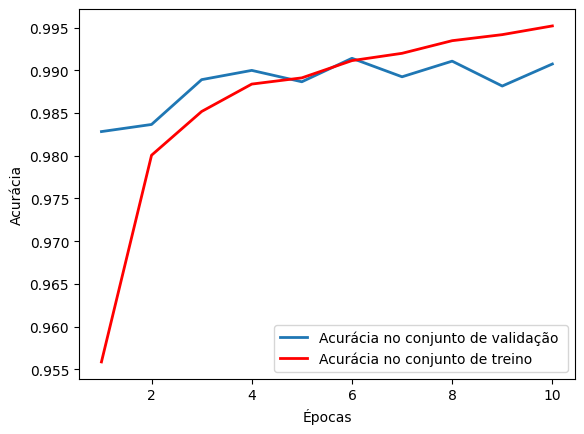

In [26]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
range_epochs = range(1, len(acc) + 1)

plt.style.use('default')
accuracy_val = plt.plot(range_epochs, val_acc, label='Acurácia no conjunto de validação ')
accuracy = plt.plot(range_epochs, acc, label='Acurácia no conjunto de treino', color="r")
plt.setp(accuracy, linewidth=2.0)
plt.setp(accuracy_val, linewidth=2.0)
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc="lower right")
plt.show()